In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

READING THE DATA

In [ ]:
#reading the csv dataset
df = pd.read_csv('/content/Obesity Classification.csv')

In [ ]:
#read the function
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  87 non-null     float64
 4   Weight  102 non-null    float64
 5   BMI     101 non-null    float64
 6   Label   98 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 6.0+ KB


In [ ]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175.0,80.0,25.3,Normal Weight
1,2,30,Female,160.0,60.0,22.5,Normal Weight
2,3,35,Male,180.0,90.0,27.3,Overweight
3,4,40,Female,150.0,50.0,20.0,Underweight
4,5,45,Male,190.0,100.0,31.2,Obese


In [ ]:
#check the number of columns
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [ ]:
df.shape

(108, 7)

In [ ]:
#describing the value
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,87.000000,102.000000,101.000000
mean,56.046296,46.555556,166.091954,59.362745,21.345545
std,31.917939,24.720620,29.347807,28.681173,7.086727
min,1.000000,11.000000,120.000000,10.000000,5.600000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,22.500000
75%,83.250000,59.250000,190.000000,83.750000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [ ]:
# verifying the null values
df.isnull().sum()

ID         0
Age        0
Gender     0
Height    21
Weight     6
BMI        7
Label     10
dtype: int64

In [ ]:
#using mean functions verify the basic mean of given data set
df['Height'].mean()

166.09195402298852

In [ ]:
#verify the value_counts of a specific columns

df['Height'].value_counts()

140.0    10
200.0    10
190.0     9
130.0     9
210.0     9
175.0     8
160.0     8
180.0     8
150.0     8
120.0     8
Name: Height, dtype: int64

In [ ]:
#filling the null values

df['Height'].fillna(8,inplace=True)

In [ ]:
#filling the null values
df['Weight'].fillna(8,inplace=True)

In [ ]:
#filling the null values
df['BMI'].fillna(7,inplace=True)

In [ ]:
#filling the null values
df["Label"].fillna(0,inplace=True)

In [ ]:
#cross verifying the null values
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [ ]:
#checking correlation
df.corr()

,ID,Age,Height,Weight,BMI
ID,1.000000,-0.298257,-0.324545,-0.520057,-0.619579
Age,-0.298257,1.000000,0.327846,0.466620,0.469212
Height,-0.324545,0.327846,1.000000,0.363533,0.379822
Weight,-0.520057,0.466620,0.363533,1.000000,0.890099
BMI,-0.619579,0.469212,0.379822,0.890099,1.000000


<Axes: xlabel='BMI', ylabel='Label'>

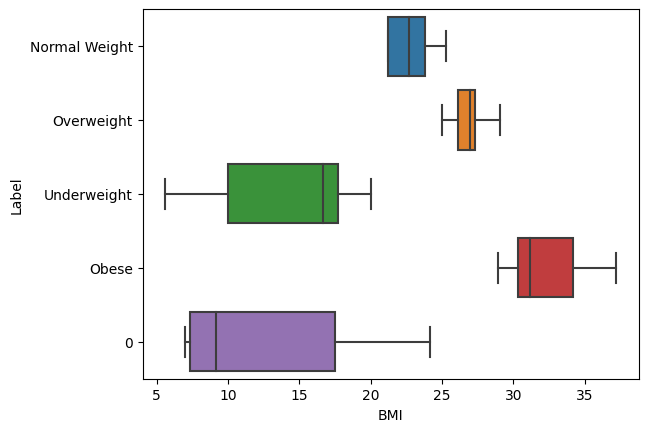

In [ ]:
#using seaborn plotting the boxplot diagram.
sns.boxplot(x='BMI', y='Label', data =df)

We Observed that generally the age in between 30-35 age group people are suffering from 'Obese' alot (i.e they suffering with overthinking).

<Axes: xlabel='Label', ylabel='BMI'>

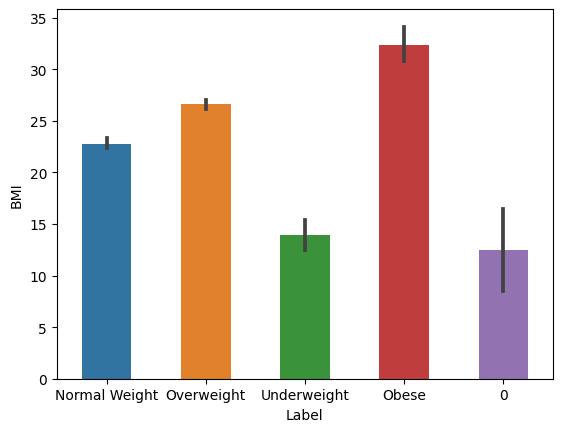

In [ ]:
#using seaborn plotting the barplot diagram.
sns.barplot( x='Label',y='BMI',data =df, width=0.5)

In [ ]:
#checking whether the age is greater than 100

abc=df[df['Age']>100]
abc.value_counts()

ID  Age  Gender  Height  Weight  BMI   Label      
29  103  Female  130.0   30.0    13.3  Underweight    1
30  108  Male    210.0   120.0   37.2  Obese          1
58  102  Female  130.0   75.0    25.0  Overweight     1
59  107  Male    210.0   105.0   28.9  Obese          1
60  112  Female  120.0   85.0    27.5  Overweight     1
dtype: int64

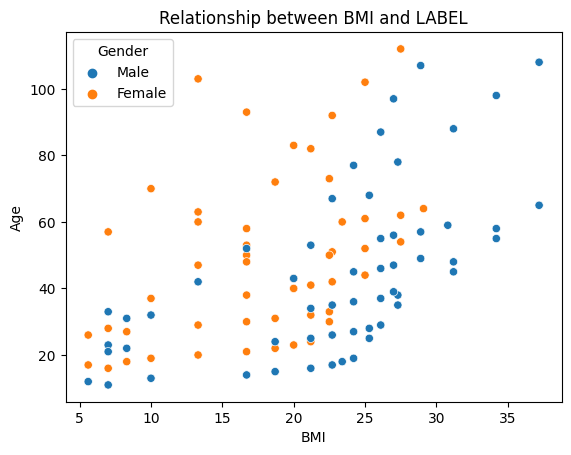

In [ ]:
 #customize the scatter plot
sns.scatterplot(x="BMI", y="Age",hue="Gender", sizes=(50, 200),data=df)

#add labels and title
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Relationship between BMI and LABEL")

#display the plot
plt.show()

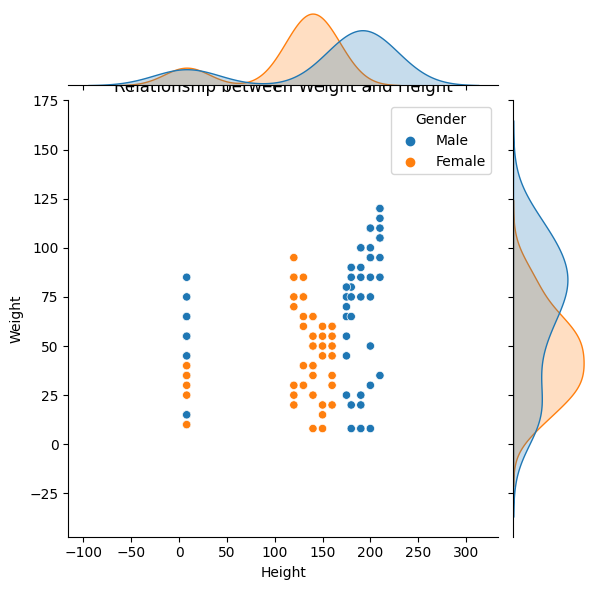

In [ ]:
#customize the joint plot
sns.jointplot(x="Height", y="Weight",hue="Gender", sizes=(50, 200),data=df)

#add labels and title
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Relationship between Weight and Height")

#display the plot
plt.show()

 The average height of every single person is in between 150 - 200.

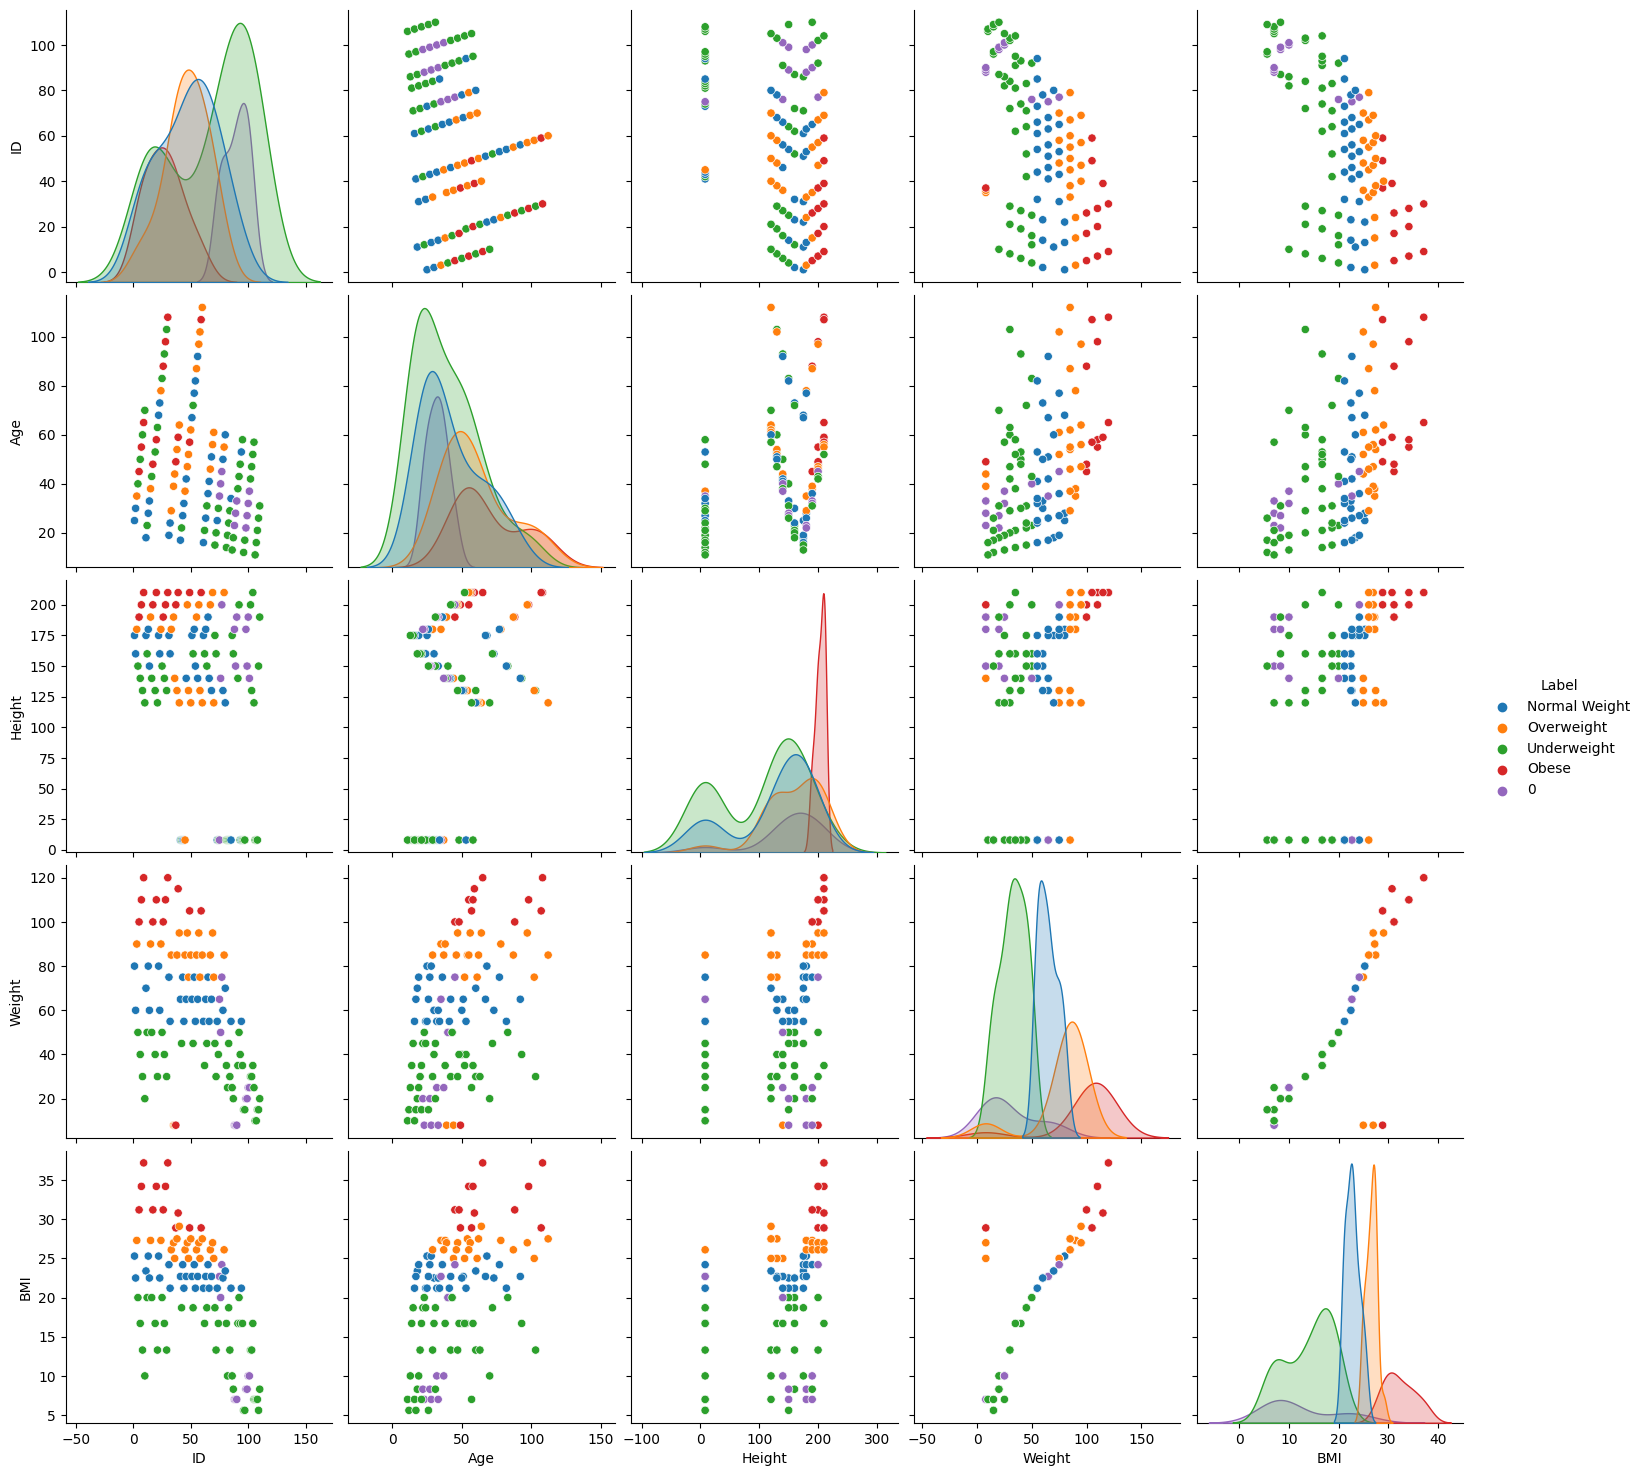

In [ ]:
sns.pairplot(data=df,hue="Label", size=3)

In [ ]:
#checking whether the value counts of LABEL column
df["Label"].value_counts()

Underweight      39
Normal Weight    27
Overweight       20
Obese            12
0                10
Name: Label, dtype: int64

LABEL ENCODING

In [ ]:
#by using label encoding importing libraries
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175.0,80.0,25.3,Normal Weight
1,2,30,0,160.0,60.0,22.5,Normal Weight
2,3,35,1,180.0,90.0,27.3,Overweight
3,4,40,0,150.0,50.0,20.0,Underweight
4,5,45,1,190.0,100.0,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,1,8.0,10.0,7.0,Underweight
104,107,16,0,8.0,10.0,7.0,Underweight
105,108,21,1,8.0,15.0,7.0,Underweight
106,109,26,0,150.0,15.0,5.6,Underweight


In [ ]:
df['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese', 0],
      dtype=object)

In [ ]:
processed_dat = df.copy()
processed_dat["Gender"] = LabelEncoder().fit_transform(processed_dat["Gender"])
# map Label to ordinal encoding
label_map = {
    "Underweight": 1,
    "Normal Weight": 2,
    "Overweight": 3,
    "Obese": 4,
}
df = processed_dat.replace({"Label": label_map})

df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175.0,80.0,25.3,2
1,2,30,0,160.0,60.0,22.5,2
2,3,35,1,180.0,90.0,27.3,3
3,4,40,0,150.0,50.0,20.0,1
4,5,45,1,190.0,100.0,31.2,4


In [ ]:
#describing X AND Y VALUES

x=df.drop("Label",axis=1)
y=df["Label"]

FEATURE ENGINEERING

In [ ]:
#SEPERATING THE DATA BY USING TRAIN AND TEST

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

LOGISTIC REGRESSION

In [ ]:
#by using logistic regression importing libraries
from sklearn.linear_model import LogisticRegression
df=LogisticRegression(random_state=42)
df.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred=df.predict(x_test)
print(y_pred)

[3 2 3 1 4 2 1 2 4 0 1 0 2 2 2 3 2 1 1 3 2 1 2 3 4 1 4 1 1 4 4 2 1]


In [ ]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
accuracy

42.42424242424242

In [ ]:
# importing standrad scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

AdaBoostClassifier

In [ ]:
#importing AdaBooster
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [ ]:
#finding accuracy
from sklearn import metrics
acc_sc = metrics.accuracy_score(y_test, y_pred)
print(acc_sc)

0.6060606060606061


GRADIENT BOOSTING

In [ ]:
#importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=3,learning_rate=1)
model.fit(x,y)

GradientBoostingRegressor(learning_rate=1, n_estimators=3)

In [ ]:
#finding accuracy
model_prediction = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.6060606060606061

  DECISION TREE


In [ ]:
#importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
#finding accuracy
model1_prediction = model1.predict(X_test_scaled)
accuracy_score(model1_prediction, y_test)

0.8484848484848485

USING KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Fitting the models in K-Nearest Neighbors (KNN)

classi = KNeighborsClassifier(n_neighbors=2)
classi.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
classi_pred = classi.predict(X_test_scaled)

In [ ]:
#finding accuracy
accuracy_score(y_test, classi_pred)

0.45454545454545453

USING SCALAR VECTOR MACHINE.

In [ ]:
#importing SVC
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [ ]:
#finding accuracy
svc_pred = svc.predict(X_test_scaled)
accuracy_score(y_test, svc_pred)

0.5757575757575758

NAVIES BAYES

In [ ]:
#by using Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_b = GaussianNB()
naive_b.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
#finding accuracy
naive_b_pred = naive_b.predict(X_test_scaled)
accuracy_score(y_test, naive_b_pred)

0.6666666666666666

BY  USING ALL MODELS

In [ ]:
# All Model Scores

results = pd.DataFrame({
    'Model' : ['Logistic Regression','AdaBoostClassifier','GradientBoostingRegressor','Decision Tree', 'KNN','SVM', 'Naive Bayes'],
    'Accuracy_Score' : ['0.42','0.60','0.60','0.84','0.45','0.57','0.66'],

})

results_df = results.sort_values(by="Accuracy_Score", ascending=False)
results_df = results_df.set_index('Accuracy_Score')
results_df.head()

,Model
Accuracy_Score,
0.84,Decision Tree
0.66,Naive Bayes
0.60,AdaBoostClassifier
0.60,GradientBoostingRegressor
0.57,SVM


CONCLUSION
1. We observed that outliers are too far away from the line.
2. We observed that the average height of every single person is in between Male with 150 - 200, Females 100-150.
3. The highest accuracy by using GradientBoosting regresson with 84%.
4. The lowest accuracy by using K_NN regression with 45%.